# CO416 - Machine Learning for Imaging

## Coursework 1 - Classification

In this coursework you will be applying the material taught in the course up to and including lecture 4.

$\mathbf{NOTE - \text{READ THIS}:}$ 
- During this coursework you will be asked to comment on the performance of various aspects of the models you develop. The discussion should be done along the following lines:
    - Maximum 100 words of discussion - You are asked to be brief and on point, platitudes and excessive writing will be penalized
    - You should mention effects on accuracy, and computational requirements i.e. time and computational complexities. Empirical arguments are accepted 
    
- When you are asked to change the hyperparamenters, validate the performance of your classifier and explicitly state the optimal hyperparameters you found and their accuracy

## Question 1 (50 Points) 

In this question we will use a toy spiral dataset as generated by the [`make_moons`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html) function of sklearn

1) Create a dataset of 1000 points with a noise value of 0.1 and random_state=0 and augment it using polynomial features (recommended degree 10-15) (4 points)

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
from sklearn.datasets import make_moons
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
import sklearn.decomposition
import numpy as np
import time

In [3]:
x_data, y_data = make_moons(1000, noise=0.5, random_state=0)
poly = sklearn.preprocessing.PolynomialFeatures(degree=10)
x_data_poly = poly.fit_transform(x_data)
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x_data_poly, y_data, test_size=0.2) 

2) Visualize your input data - the first 2 dimensions would suffice  (3 points)



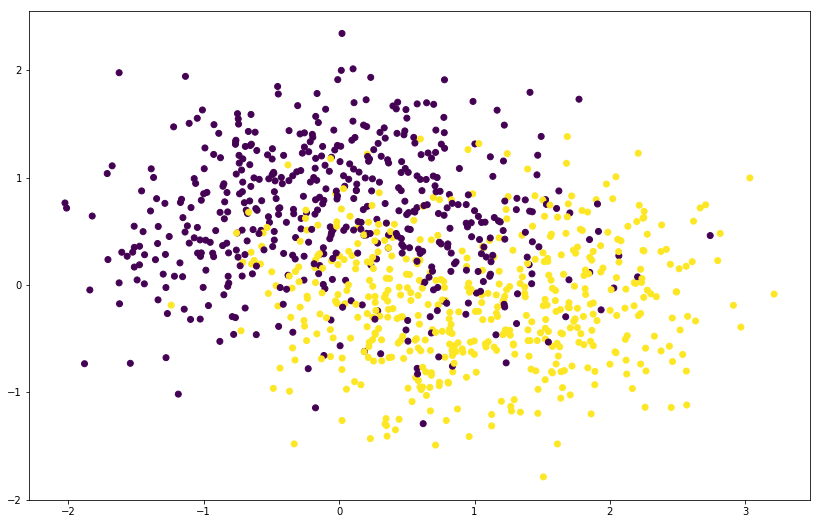

In [4]:
plt.figure(figsize=(14,9))
plt.scatter(x_data_poly[:,1], x_data_poly[:, 2], c=y_data)

3) Use a Decision Tree to classify the data (5 points)



In [5]:
# Task 3 
model = tree.DecisionTreeClassifier(random_state=0)
model.fit(x_train, y_train)
print("Accuracy of Decision tree with standard settings: {}".format(model.score(x_test, y_test)))

#Task 4

num_runs = 20

#Gini test run
model = tree.DecisionTreeClassifier(criterion='gini', random_state=0)

sum_acc = 0
for i in range(num_runs):
    model.fit(x_train, y_train)
    sum_acc += model.score(x_test, y_test)
acc = sum_acc/num_runs
print("Accuracy for Gini: {} tested over: {} runs".format(acc, num_runs))

# Entropy test run
model = tree.DecisionTreeClassifier(criterion='entropy', random_state=0)

sum_acc = 0
for i in range(num_runs):
    model.fit(x_train, y_train)
    sum_acc += model.score(x_test, y_test)
acc = sum_acc/num_runs
print("Accuracy for Entropy: {} tested over: {} runs".format(acc, num_runs))

Accuracy of Decision tree with standard settings: 0.72
Accuracy for Gini: 0.7200000000000002 tested over: 20 runs
Accuracy for Entropy: 0.7449999999999997 tested over: 20 runs


4) Try both Gini Impurity and Information Gain, which performs better? What is the difference between them? (4 points)

Both losses result in approximately the same accuracy. Information gain is given by the change in entropy from parent node to the weighted average of the children nodes. The Gini index measures how mixed the classes are after the split. Gini loss is somewthat less computationally expensive as it doesn't compute the log.  

5) Perform classification using a tree depth of 1-20. Plot the accuracy versus tree depth. (5 points)



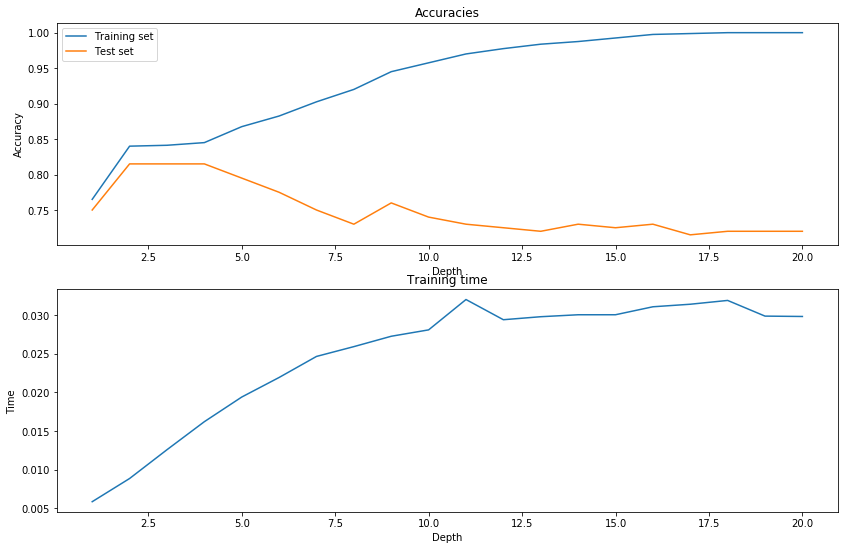

In [6]:
acc_train = np.zeros(20)
acc_test =  np.zeros(20)
times = np.zeros(20)
depths = list(range(1,21))

for depth in depths:
    start_time = time.time()
    model = tree.DecisionTreeClassifier(criterion='gini', max_depth=depth, random_state=0)
    model.fit(x_train, y_train)
    times[depth-1] = time.time() - start_time
    
    acc_train[depth-1] = model.score(x_train, y_train)
    acc_test[depth-1] = model.score(x_test, y_test)


plt.figure(figsize=(14,9))
plt.subplot(2,1,1)
plt.plot(depths, acc_train, depths, acc_test)
plt.legend(['Training set', "Test set"])
plt.title('Accuracies')
plt.xlabel('Depth')
plt.ylabel('Accuracy');
plt.subplot(2,1,2)
plt.title('Training time')
plt.plot(depths, times)
plt.xlabel('Depth')
plt.ylabel('Time');


6) How does the depth of a tree affect performance and computational burden? (1 points)



We see that the tree overfits quite quickly, and the best depth is around 2-3. As each node can split into two, the computational complexity increases by O(2^N) where N is the depth. The actual training time doesn't increase exponentially though, since the full depth isn't utilized for each branch.

7) Use Bootstrap Classifier to classify your data, base estimator should be a decision tree. Tune hyperparameters of tree depth, n_of estimators, max_samples and bootstrap. Plot accuracy versus different hyperparameters. (7 points)



Final results with depth: 3, number of estimators: 50, max samples: all, accuracy: 0.82


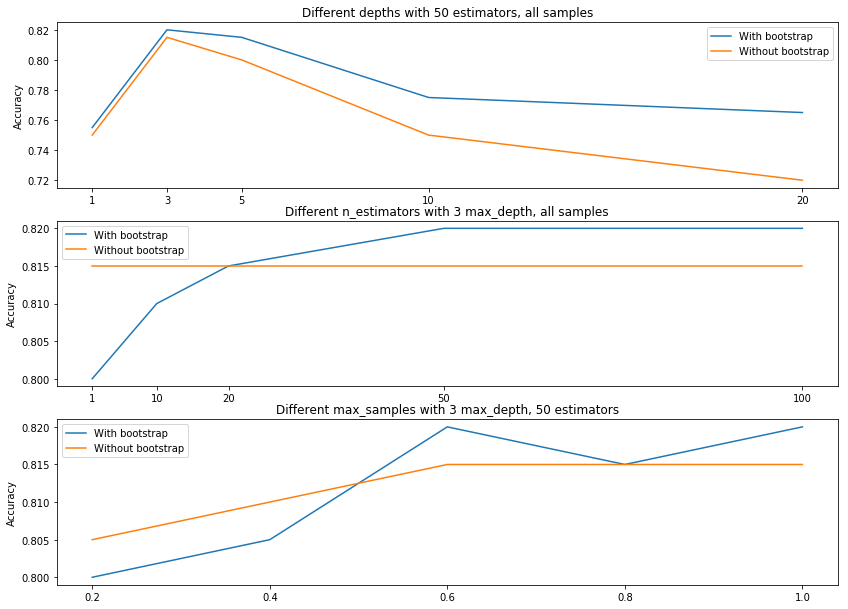

In [8]:
base_depth = 3
base_n_estimators = 50

depths = [1,3,5,10,20]
n_estimators=[1, 10, 20, 50, 100]
max_samples = [0.2, 0.4, 0.6, 0.8, 1.]

plt.figure(figsize=(14,14))

acc_w_bootstrap = []
acc_no_bootstrap = []
for depth in depths:
    base_estimator = tree.DecisionTreeClassifier(criterion='gini', max_depth=depth, random_state=0)
    model = BaggingClassifier(base_estimator=base_estimator, n_estimators=base_n_estimators, 
                              max_samples=1., bootstrap=True, random_state=42)
    model.fit(x_train, y_train)
    acc_w_bootstrap.append(model.score(x_test, y_test))
    
    model = BaggingClassifier(base_estimator=base_estimator, n_estimators=base_n_estimators, 
                              max_samples=1., bootstrap=False, random_state=42)
    model.fit(x_train, y_train)
    acc_no_bootstrap.append(model.score(x_test, y_test))

plt.subplot(4, 1, 1)
plt.plot(depths, acc_w_bootstrap, depths, acc_no_bootstrap)
plt.legend(['With bootstrap', 'Without bootstrap'])
plt.xticks(depths)
plt.ylabel('Accuracy')
plt.title("Different depths with {} estimators, all samples".format(base_n_estimators))

acc_w_bootstrap = []
acc_no_bootstrap = []
for n_estimator in n_estimators:
    base_estimator = tree.DecisionTreeClassifier(criterion='gini', max_depth=base_depth, random_state=0)
    
    model = BaggingClassifier(base_estimator=base_estimator, n_estimators=n_estimator, max_samples=1., 
                              bootstrap=True, random_state=42)
    model.fit(x_train, y_train)
    acc_w_bootstrap.append(model.score(x_test, y_test))
    
    model = BaggingClassifier(base_estimator=base_estimator, n_estimators=n_estimator, max_samples=1., 
                              bootstrap=False, random_state=42)
    model.fit(x_train, y_train)
    acc_no_bootstrap.append(model.score(x_test, y_test))

plt.subplot(4, 1, 2)
plt.plot(n_estimators, acc_w_bootstrap, n_estimators, acc_no_bootstrap)
plt.legend(['With bootstrap', 'Without bootstrap'])
plt.xticks(n_estimators)
plt.ylabel('Accuracy')
plt.title("Different n_estimators with {} max_depth, all samples".format(base_depth))

acc_w_bootstrap = []
acc_no_bootstrap = []
for max_sample in max_samples:
    base_estimator = tree.DecisionTreeClassifier(criterion='gini', max_depth=base_depth)
    model = BaggingClassifier(base_estimator=base_estimator, n_estimators=base_n_estimators, max_samples=max_sample, 
                              bootstrap=True, random_state=42)
    model.fit(x_train, y_train)
    acc_w_bootstrap.append(model.score(x_test, y_test))
    
    model = BaggingClassifier(base_estimator=base_estimator, n_estimators=base_n_estimators, max_samples=max_sample, 
                              bootstrap=False, random_state=42)
    model.fit(x_train, y_train)
    acc_no_bootstrap.append(model.score(x_test, y_test))

plt.subplot(4, 1, 3)
plt.plot(max_samples, acc_w_bootstrap, max_samples, acc_no_bootstrap)
plt.legend(['With bootstrap', 'Without bootstrap'])
plt.xticks(max_samples)
plt.ylabel('Accuracy')
plt.title("Different max_samples with {} max_depth, {} estimators".format(base_depth, base_n_estimators));


base_estimator = tree.DecisionTreeClassifier(criterion='gini', max_depth=base_depth, random_state=42)
model = BaggingClassifier(base_estimator=base_estimator, n_estimators=base_n_estimators, 
                          max_samples=max_sample, bootstrap=True, random_state=42)
model.fit(x_train, y_train)
acc = model.score(x_test, y_test)
print("Final results with depth: {}, number of estimators: {}, max samples: all, accuracy: {}".
      format(base_depth, base_n_estimators, acc))

8) Why do we use Bootstraping when we create our datasets? Did you use replacement ? Why ? (1 points) 

We generally see that classifiers with bootstrap are better, especially for hyperparameters that can result in overfitting (large depth, many estimators, full sample size). The reason is that bootstrap forces each classifier to focus on different part of the dataset, so the combination of the classifiers reduces variance. We use replacement to make sure that the bootstraped datasets are different. 

9)  Use a Decision Forest to classify the new dataset (4 points)



model = RandomForestClassifier()
model.fit(x_train, y_train)
print(model.score(x_test, y_test))

10) Modulate the number of trees to 1-99 with a step of 10. Plot accuracy versus number of trees. (4 points)



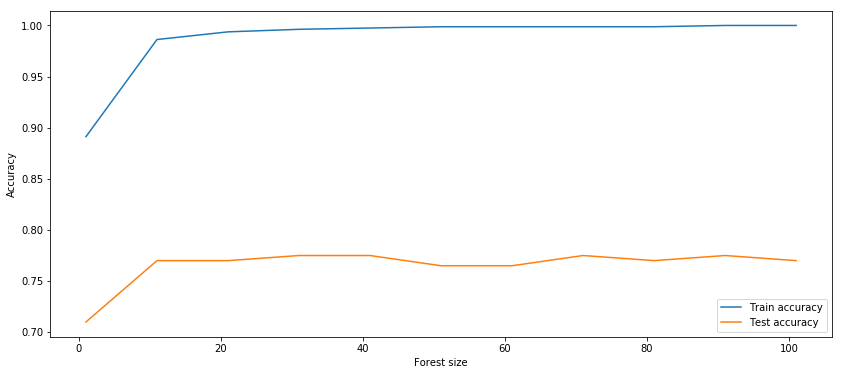

In [9]:
# Im assuming this task means 1-101, since 99 never will be reached with steps of 10

acc_train = []
acc_test = []

forest_size = list(range(1,102,10))
for size in forest_size:
    model = RandomForestClassifier(n_estimators=size, random_state=42)
    model.fit(x_train, y_train)
    acc_train.append(model.score(x_train, y_train))
    acc_test.append(model.score(x_test, y_test))
    
plt.figure(figsize=(14,6))
plt.plot(forest_size, acc_train, forest_size, acc_test)
plt.legend(['Train accuracy', 'Test accuracy'])
plt.xlabel("Forest size")
plt.ylabel("Accuracy");

11) Modulate the depth of  the trees from 1 to 20 - use best number of trees from above. Plot the accuracy versus depth. (4 points)



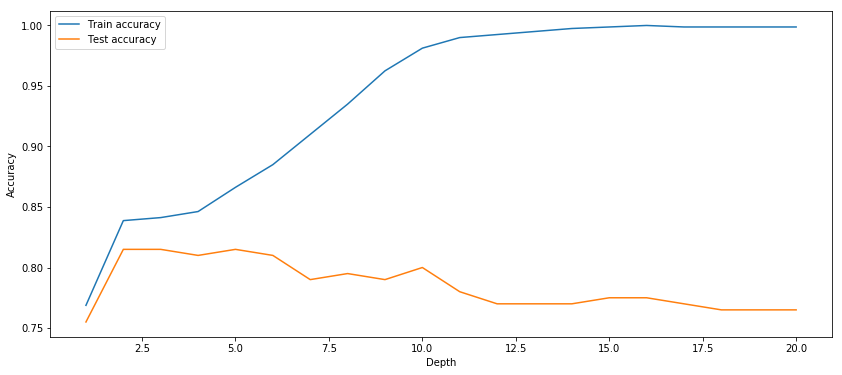

In [10]:
acc_train = []
acc_test = []

depths = list(range(1,21))
for depth in depths:
    model = RandomForestClassifier(n_estimators = 51, max_depth=depth, random_state=42)
    model.fit(x_train, y_train)
    acc_train.append(model.score(x_train, y_train))
    acc_test.append(model.score(x_test, y_test))
    
plt.figure(figsize=(14,6))
plt.plot(depths, acc_train, depths, acc_test)
plt.legend(['Train accuracy', 'Test accuracy'])
plt.xlabel("Depth")
plt.ylabel("Accuracy");

12) Comment on the performance change while you modulate depth of trees and number of trees (3 points)

It seems like the tree depth should be quite low (2-3), as long as we use enough trees. This also confirms the idea of random forests, that an ensemble of weak learners can create a strong learner. We have trouble with overfitting for larger tree depths, so a larger training set could be beneficial. The computational complexity increases linearly with respect to number of trees and exponentially with respect to depth. 

13) Visualise how the classification split is done in relation to the data both for Decision Tree and Decision Forest (3 points)

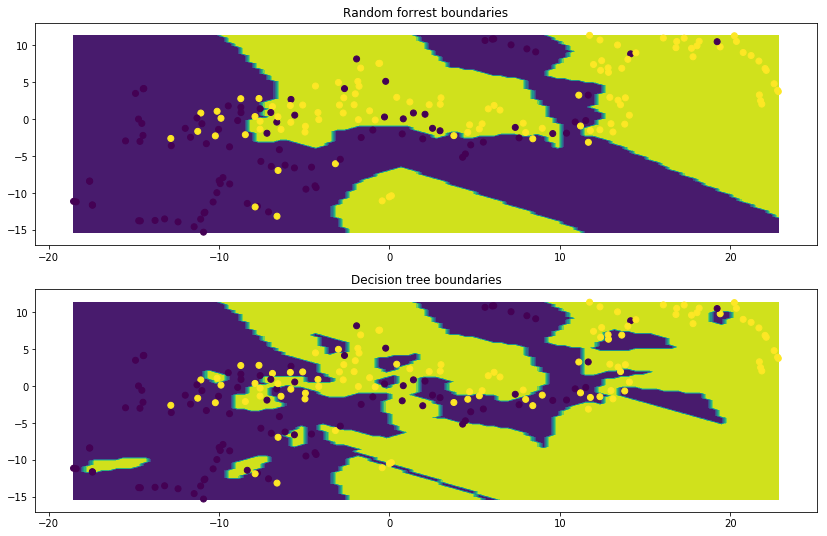

In [14]:
from sklearn.manifold.t_sne import TSNE
from sklearn.neighbors.classification import KNeighborsClassifier

def plot_boundary(model, x, y, res=100):
    
    """
    Inspired from tutorial 2. 
    """
    
    y_pred=model.predict(x)
    x_train_2d = TSNE(n_components=2, random_state=42).fit_transform(x)
    
    x1_min, x1_max = np.min(x_train_2d[:,0]), np.max(x_train_2d[:,0])
    x2_min, x2_max = np.min(x_train_2d[:,1]), np.max(x_train_2d[:,1])
    grid_1 = np.linspace(x1_min, x1_max, res)
    grid_2 = np.linspace(x2_min, x2_max, res)
    mesh_x1, mesh_x2 = np.meshgrid(grid_1, grid_2)

    background_model = KNeighborsClassifier(n_neighbors=1).fit(x_train_2d, y_pred)
    background = background_model.predict(np.concatenate([mesh_x1.ravel().reshape(-1, 1), 
                                                          mesh_x2.ravel().reshape(-1, 1)], axis=1))
    background = background.reshape(res, res)
    
    plt.contourf(mesh_x1, mesh_x2, background)
    plt.scatter(x_train_2d[:,0], x_train_2d[:,1], c=y)

plt.figure(figsize=(14,9))
plt.subplot(2,1,1)
model = RandomForestClassifier(n_estimators = 20, max_depth=3, random_state=42)
model.fit(x_train, y_train)
plot_boundary(model, x_test, y_test)
plt.title('Random forrest boundaries')

plt.subplot(2,1,2)
model = tree.DecisionTreeClassifier(criterion='gini', max_depth=40, random_state=42)
model.fit(x_train, y_train)
plot_boundary(model, x_test, y_test)
plt.title('Decision tree boundaries');

We clearly see that the decision tree has much more complex decision boundaries, and therefore is more prone to overfitting compared to the forest. 

## Question 2 (50 Points)
In this question we will be using the fashion-MNIST dataset for image classification. 

If you are interested, you may find relevant information regarding the dataset in this paper:
Fashion-MNIST: A novel image dataset for benchmarking machine learning algorithms. Han Xiao, Kashif Rasul, Roland Vollgraf. [arXiv:1708.07747](https://arxiv.org/abs/1708.07747)

The data is provided under `/vol/lab/course/416/data/fashion`. The dataset is already split into a set of 60,000 training images and a set of 10,000 test images. The images are of size 28x28 pixels and stored as 784-dimensional vector. So if you would like to visualise the images, you need to reshape the array.

There are in total 10 classes, which are labelled as follows:
0. T-shirt/top
1. Trousers
2. Pullover
3. Dress
4. Coat
5. Sandal
6. Shirt
7. Sneaker
8. Bag
9. Ankle boot

**Your tasks are** (all tasks carry equal marks):
- Use a Decision Forest to classify t-shirts and ankle boots - tune your forest!
- Train and compare an Adaboost classifier with a decision tree 
- Modulate the number of trees in the Adaboost and the depth of the trees. Comment on the performance and complexity 
- Train a Decsiion Forest for all classes and also compare the performance with another ensemble algorithm of your choice
- What is the theoretical difference between Random Forests and Adaboost classifiers? (100 words max)

In [17]:
# load the data
import numpy as np
import pandas as pd

# data_dir = '/vol/lab/course/416/data/fashion/'
data_dir = './fashion/'
df_train = pd.read_csv(data_dir + 'fashion_mnist_train.csv')
df_test = pd.read_csv(data_dir + 'fashion_mnist_test.csv')

x_train = df_train.drop('label', axis=1).as_matrix().astype(np.uint8)
y_train = df_train['label'].as_matrix().astype(np.uint8)
x_test = df_test.drop('label', axis=1).as_matrix().astype(np.uint8)
y_test = df_test['label'].as_matrix().astype(np.uint8)

x_train, x_val, y_train, y_val = sklearn.model_selection.train_test_split(x_train, y_train, test_size=0.2) 

/Users/patrick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # Remove the CWD from sys.path while we load stuff.
/Users/patrick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # This is added back by InteractiveShellApp.init_path()
/Users/patrick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if sys.path[0] == '':
/Users/patrick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  del sys.path[0]


## Decision forest classifier

In [18]:
x_train_tskirt_boot = x_train[(y_train == 0) + (y_train == 9)]
y_train_tskirt_boot = y_train[(y_train == 0) + (y_train == 9)]

x_val_tskirt_boot = x_val[(y_val == 0) + (y_val == 9)]
y_val_tskirt_boot = y_val[(y_val == 0) + (y_val == 9)]

x_test_tskirt_boot = x_test[(y_test == 0) + (y_test == 9)]
y_test_tskirt_boot = y_test[(y_test == 0) + (y_test == 9)]

depths = [1, 5, 10, 20, 50]
n_estimators = [1, 5, 10, 20, 50]

best_para_randforrest = []
best_score_randforrest = 0

print("Training Adaboost")
print("Parameters = [Depth, Num_Estimators]")

for depth in depths:
    for estimators in n_estimators:
        model = RandomForestClassifier(n_estimators = estimators, max_depth=depth, random_state=42)
        model.fit(x_train_tskirt_boot, y_train_tskirt_boot)
        score = model.score(x_val_tskirt_boot, y_val_tskirt_boot)
        print("Parameters: {}, validation accuracy: {}".format([depth, estimators], score))
        if score > best_score_randforrest:
            best_score_randforrest = score
            best_para_randforrest = [depth, estimators]


model = RandomForestClassifier(n_estimators = best_para_randforrest[1], max_depth=best_para_randforrest[0], 
                               random_state=42)
model.fit(x_train_tskirt_boot, y_train_tskirt_boot)
score = model.score(x_test_tskirt_boot, y_test_tskirt_boot)
print("\nFinal Test set result for forest with depth: {}, number learners: {} acuracy: {}".
      format(best_para_randforrest[0], best_para_randforrest[1], score))

Training Adaboost
Parameters = [Depth, Num_Estimators]
Parameters: [1, 1], validation accuracy: 0.9812656119900083
Parameters: [1, 5], validation accuracy: 0.9950041631973355
Parameters: [1, 10], validation accuracy: 0.9966694421315571
Parameters: [1, 20], validation accuracy: 0.9962531223980017
Parameters: [1, 50], validation accuracy: 0.9979184013322231
Parameters: [5, 1], validation accuracy: 0.9962531223980017
Parameters: [5, 5], validation accuracy: 0.9995836802664446
Parameters: [5, 10], validation accuracy: 0.9995836802664446
Parameters: [5, 20], validation accuracy: 0.9987510407993339
Parameters: [5, 50], validation accuracy: 0.9995836802664446
Parameters: [10, 1], validation accuracy: 0.9962531223980017
Parameters: [10, 5], validation accuracy: 1.0
Parameters: [10, 10], validation accuracy: 0.9995836802664446
Parameters: [10, 20], validation accuracy: 0.9995836802664446
Parameters: [10, 50], validation accuracy: 0.9995836802664446
Parameters: [20, 1], validation accuracy: 0.99

## Adaboost with decision tree

In [19]:
depths = [1, 5, 10, 20, 50]
n_estimators = [1, 5, 10, 20, 50]

best_para_adaboost = []
best_score_adaboost = 0

print("Training Adaboost")
print("Parameters = [Depth, Num_Estimators]")

for depth in depths:
    for estimators in n_estimators:        
        base_estimator = tree.DecisionTreeClassifier(criterion='gini', max_depth=depth, random_state=42)
        model = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=estimators, 
                                   learning_rate=1., random_state=42)
        model.fit(x_train_tskirt_boot, y_train_tskirt_boot)
        score = model.score(x_val_tskirt_boot, y_val_tskirt_boot)
        print("Parameters: {}, validation accuracy: {}".format([depth, estimators], score))
        if score > best_score_adaboost:
            best_score_adaboost = score
            best_para_adaboost = [depth, estimators]

best_para_dec_tree = []
best_score_dec_tree = 0

base_estimator = tree.DecisionTreeClassifier(criterion='gini', max_depth=best_para_adaboost[0], random_state=42)
model = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=best_para_adaboost[1], 
                           learning_rate=1., random_state=42)
model.fit(x_train_tskirt_boot, y_train_tskirt_boot)
score = model.score(x_test_tskirt_boot, y_test_tskirt_boot)
print("\nFinal Test set result for Adaboost with depth: {}, number learners: {} acuracy: {}".
      format(best_para_randforrest[0], best_para_randforrest[1], score))

print("\nTraining Decision Tree")
print("Parameters = Depth")
for depth in depths:
    model = tree.DecisionTreeClassifier(criterion='gini', max_depth=depth, random_state=42)
    model.fit(x_train_tskirt_boot, y_train_tskirt_boot)
    score = model.score(x_val_tskirt_boot, y_val_tskirt_boot)
    print("Parameters: {}, validation accuracy: {}".format(depth, score))
    if score > best_score_adaboost:
        best_score_dec_tree = score
        best_para_dec_tree = [depth]

model = tree.DecisionTreeClassifier(criterion='gini', max_depth=best_para_adaboost[0], random_state=42)
model.fit(x_train_tskirt_boot, y_train_tskirt_boot)
score = model.score(x_test_tskirt_boot, y_test_tskirt_boot)
print("\nFinal Test set result for decision tree with depth: {}, acuracy: {}".
      format(best_para_randforrest[0], score))

Training Adaboost
Parameters = [Depth, Num_Estimators]
Parameters: [1, 1], validation accuracy: 0.9912572855953372
Parameters: [1, 5], validation accuracy: 0.9962531223980017
Parameters: [1, 10], validation accuracy: 0.9987510407993339
Parameters: [1, 20], validation accuracy: 0.9991673605328892
Parameters: [1, 50], validation accuracy: 0.9991673605328892
Parameters: [5, 1], validation accuracy: 0.9979184013322231
Parameters: [5, 5], validation accuracy: 0.9987510407993339
Parameters: [5, 10], validation accuracy: 0.9991673605328892
Parameters: [5, 20], validation accuracy: 0.9995836802664446
Parameters: [5, 50], validation accuracy: 0.9995836802664446
Parameters: [10, 1], validation accuracy: 0.9987510407993339
Parameters: [10, 5], validation accuracy: 0.9987510407993339
Parameters: [10, 10], validation accuracy: 0.9987510407993339
Parameters: [10, 20], validation accuracy: 0.9987510407993339
Parameters: [10, 50], validation accuracy: 0.9987510407993339
Parameters: [20, 1], validation

## Comparision of Adaboost and Decision forest

The dataset is quite simple to classify, so both the Adaboost and tree perform very well. Adaboost has some overfitting though for large numbers of trees. Since training adaboost is much slower than the decision tree and the tree is more explainable, we would probabaly use the tree in this case. 

## Size and complexity of Adaboost

The best parameters for Adaboost are depth 10 and 5 estimators. The Adaboost classifier is more time consuming than the forrests, as it has to recalcuate the weights of the training data for each run. 

## Random forest on whole MNIST set

In [20]:
depths = [2, 5, 10, 20]
n_estimators = [10, 20, 50, 100, 200]

best_para = []
best_score = 0

print("Training Random Forest")
print("Parameters = [Depth, Num_Estimators]")

for depth in depths:
    for estimators in n_estimators:
        model = RandomForestClassifier(n_estimators = estimators, max_depth=depth, random_state=42)
        model.fit(x_train, y_train)
        score = model.score(x_val, y_val)
        print("Parameters: {}, validation accuracy: {}".format([depth, estimators], score))
        if score > best_score:
            best_score = score
            best_para = [depth, estimators]
            
model = RandomForestClassifier(criterion='gini', n_estimators=best_para[1], max_depth=best_para[0], random_state=42)
model.fit(x_train, y_train)
score = model.score(x_test, y_test)
print("\nFinal result for random forest, depth: {}, n_estimators: {}, accuracy: {}".
      format(best_para[0], best_para[1], score))

Training Random Forest
Parameters = [Depth, Num_Estimators]
Parameters: [2, 10], validation accuracy: 0.5948333333333333
Parameters: [2, 20], validation accuracy: 0.6064166666666667
Parameters: [2, 50], validation accuracy: 0.59425
Parameters: [2, 100], validation accuracy: 0.5695
Parameters: [2, 200], validation accuracy: 0.5705833333333333
Parameters: [5, 10], validation accuracy: 0.7753333333333333
Parameters: [5, 20], validation accuracy: 0.773
Parameters: [5, 50], validation accuracy: 0.7743333333333333
Parameters: [5, 100], validation accuracy: 0.7740833333333333
Parameters: [5, 200], validation accuracy: 0.7759166666666667
Parameters: [10, 10], validation accuracy: 0.8433333333333334
Parameters: [10, 20], validation accuracy: 0.8463333333333334
Parameters: [10, 50], validation accuracy: 0.85325
Parameters: [10, 100], validation accuracy: 0.853
Parameters: [10, 200], validation accuracy: 0.8550833333333333
Parameters: [20, 10], validation accuracy: 0.8604166666666667
Parameters: 

## Adaboost with decision trees

In [21]:
depths = [2, 5, 10, 20]
n_estimators = [10, 15, 20]

best_para = []
best_score = 0

for depth in depths:
    for estimators in n_estimators:
        base_estimator = tree.DecisionTreeClassifier(criterion='gini', max_depth=depth, random_state=42)   
        model = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=estimators, random_state=42)
        model.fit(x_train, y_train)
        score = model.score(x_val, y_val)
        print("Parameters: {}, validation accuracy: {}".format([depth, estimators], score))
        if score > best_score:
            best_score = score
            best_para = [depth, estimators]

model = RandomForestClassifier(criterion='gini', n_estimators=best_para[1], max_depth=best_para[0], random_state=42)
model.fit(x_train, y_train)
score = model.score(x_test, y_test)
print("\nFinal result for Adaboost, depth: {}, n_estimators: {}, accuracy: {}".
      format(best_para[0], best_para[1], score))

Parameters: [2, 10], validation accuracy: 0.5448333333333333
Parameters: [2, 15], validation accuracy: 0.5369166666666667
Parameters: [2, 20], validation accuracy: 0.5230833333333333
Parameters: [5, 10], validation accuracy: 0.6321666666666667
Parameters: [5, 15], validation accuracy: 0.6635833333333333
Parameters: [5, 20], validation accuracy: 0.6341666666666667
Parameters: [10, 10], validation accuracy: 0.7435
Parameters: [10, 15], validation accuracy: 0.7599166666666667
Parameters: [10, 20], validation accuracy: 0.7720833333333333
Parameters: [20, 10], validation accuracy: 0.8225
Parameters: [20, 15], validation accuracy: 0.835
Parameters: [20, 20], validation accuracy: 0.848

Final result for Adaboost, depth: 20, n_estimators: 20, accuracy: 0.8638


## Compared performance

As the last dataset was very easy to classify for Adaboost, we decided to try it again to see the results on a more challenging dataset. Training the Adaboost on this large dataset was much slower than the forest, so we couldn't test for the same amount of hyperparameters. The results for the Adaboost are generally worse than the the random forest when using the same hyperparameters. This might be the result of Adaboost overfitting. Since the random forrest was faster to train we can also use many more estimators. 

## Theoretical difference between random forest and Adaboost

Random forest trains several treese on bootstraped datasets, using only a random subset of features at each node. This will focus on reducing the variance. Adaboost also trains several estimators, but increases the weight of misclassified points for each estimator. This will reduce the bias. Random forests are also faster to train and can be parallelized. As commented before, Adaboost is also much slower, as it has to calculate the weights. 